Квадратная решётка. В каждой ячейке с вероятностью $p$ находится частица. Частицы образуют кластеры (учитываются связи только по горизонтали или вертикали). Если есть путь, соединяющий верхний ряд с нижним, то такой кластер называем бесконечным.

Задача: определить вероятность появления бесконечного кластера, то есть значение $p$, при котором бесконечный кластер появляется. $P(p) - ?$ Для каждого $p$ нужно провести много испытаний и вычислить вероятность появления бесконечного кластера. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#N - size of lattice
#probabiliy - probability of node in lattice
def generate(probability):
    return np.random.choice([0, 1], p=[1-probability, probability])

In [3]:
def lattice_with_its_clusters(probability, N = 10):

    clusters = []
    lattice = np.zeros((N, N))

    def insert_node(x_cond, y_cond, x, y):
        for k in range(len(clusters)):
            if((x_cond, y_cond) in clusters[k]):
                clusters[k].add((x, y))
                break

    for i in range(N):
        for j in range(N):
            lattice[i, j] = generate(probability)

            if(lattice[i, j] == 1): #begin to check neighbours and app
                if(j == 0 and i == 0): #First case when i = j = 0
                    clusters.append(set())
                    clusters[0].add((i, j))
                elif(j > 0 and i == 0): #Second case when i = 0, j > 0
                    if (lattice[i, j-1] == 0):
                        clusters.append(set())
                        clusters[-1].add((i, j))
                    else:
                        insert_node(i, j-1, i, j)
                elif(j == 0 and i > 0): #Third case when i > 0, j = 0
                    if(lattice[i-1, j] == 0):
                        clusters.append(set())
                        clusters[-1].add((i, j))
                    else:
                        insert_node(i-1, j, i, j)
                else: #Last case when i > 0, j > 0
                    if(lattice[i, j-1] == 0 and lattice[i-1, j] == 0): #First case when 0, 1, 0 (left, (i,j), upper)
                        clusters.append(set())
                        clusters[-1].add((i, j))
                    elif(lattice[i, j-1] == 1 and lattice[i-1, j] == 0): #Second case when 1, 1, 0
                        insert_node(i, j-1, i, j)
                    elif(lattice[i, j-1] == 0 and lattice[i-1, j] == 1): #Third case when 0, 1, 1
                        insert_node(i-1, j, i, j)
                    else: #Fourth case when 1, 1, 1 splitted in 2 subcases
                        for k in range(len(clusters)):
                            if((i, j-1) in clusters[k]):
                                clusters[k].add((i, j)) #When neighbours are not in one cluster then:
                                if((i-1, j) not in clusters[k]): 
                                    clusters[k].add((i, j))
                                    for kk in range(len(clusters)): #merge sets via (i,j) node
                                        if((i-1, j) in clusters[kk]):
                                            for item in clusters[k]:
                                                clusters[kk].add(item)
                                            del clusters[k]
                                            break
                                    break
    return lattice, clusters

In [4]:
def has_infinite_cluster(clusters, N=10):
    for cluster in clusters:
        if(len(cluster) >= 10): #size less than number of nodes in length cannot create infinite cluster
            first = 0
            last = 0
            for node in cluster:
                if(node[0] == 0):
                    first = 1
                if(node[0] == N-1):
                    last = 1
            if(first == 1 and last == 1):
                return True
    return False

In [5]:
lat, clut = lattice_with_its_clusters(probability=0.48, N=10)
has_infinite_cluster(clut, N=10)

False

In [6]:
print(lat)
clut

[[1. 0. 0. 0. 1. 1. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 1. 0. 1.]
 [0. 1. 1. 1. 0. 0. 0. 1. 1. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 1. 1.]
 [0. 1. 1. 1. 1. 0. 1. 1. 0. 0.]
 [0. 1. 1. 0. 0. 0. 1. 0. 1. 0.]
 [1. 0. 0. 0. 1. 1. 1. 0. 1. 1.]
 [0. 0. 1. 0. 0. 0. 1. 1. 0. 1.]
 [1. 0. 1. 1. 1. 0. 0. 1. 0. 1.]]


[{(0, 0)},
 {(0, 4), (0, 5), (1, 5), (1, 6), (2, 5)},
 {(0, 8), (1, 8)},
 {(2, 7), (2, 9), (3, 7), (3, 8), (3, 9), (4, 8), (4, 9)},
 {(3, 1),
  (3, 2),
  (3, 3),
  (4, 2),
  (5, 1),
  (5, 2),
  (5, 3),
  (5, 4),
  (6, 1),
  (6, 2)},
 {(5, 6), (5, 7), (6, 6), (7, 4), (7, 5), (7, 6), (8, 6), (8, 7), (9, 7)},
 {(6, 8), (7, 8), (7, 9), (8, 9), (9, 9)},
 {(7, 0)},
 {(8, 2), (9, 2), (9, 3), (9, 4)},
 {(9, 0)}]

In [7]:
def P_probability_of_infinite_cluster(number_of_iterations, probability, N=10):
    infinite_clusters_true = 0;
    for i in range(number_of_iterations):
        lat, clut = lattice_with_its_clusters(probability, N)
        if(has_infinite_cluster(clut, N)):
            infinite_clusters_true += 1
    return infinite_clusters_true / number_of_iterations

In [8]:
prob = P_probability_of_infinite_cluster(1000, 0.3, N=10)
prob

0.0

In [19]:
import time
start_time = time.time()
prob = P_probability_of_infinite_cluster(1000, 0.3, N=5)
prob
print("--- %s seconds ---" % (time.time() - start_time))

--- 2.1995980739593506 seconds ---


In [20]:
lattice_prob_array = np.linspace(0.3, 0.8, 501)
P = []
p = []
for k in lattice_prob_array:
    print(k)
    p.append(k)
    P.append(P_probability_of_infinite_cluster(1000, k, N=5))

0.3
0.301
0.302
0.303
0.304
0.305
0.306
0.307
0.308
0.309
0.31
0.311
0.312
0.313
0.314
0.315
0.316
0.317
0.318
0.319
0.32
0.321
0.322
0.323
0.324
0.325
0.326
0.327
0.328
0.329
0.32999999999999996
0.33099999999999996
0.33199999999999996
0.33299999999999996
0.33399999999999996
0.33499999999999996
0.33599999999999997
0.33699999999999997
0.33799999999999997
0.33899999999999997
0.33999999999999997
0.34099999999999997
0.34199999999999997
0.34299999999999997
0.344
0.345
0.346
0.347
0.348
0.349
0.35
0.351
0.352
0.353
0.354
0.355
0.356
0.357
0.358
0.359
0.36
0.361
0.362
0.363
0.364
0.365
0.366
0.367
0.368
0.369
0.37
0.371
0.372
0.373
0.374
0.375
0.376
0.377
0.378
0.379
0.38
0.381
0.382
0.383
0.384
0.385
0.386
0.387
0.388
0.389
0.39
0.391
0.392
0.393
0.394
0.395
0.396
0.397
0.398
0.399
0.4
0.401
0.402
0.403
0.404
0.40499999999999997
0.40599999999999997
0.407
0.408
0.409
0.41
0.411
0.412
0.413
0.414
0.415
0.416
0.417
0.418
0.419
0.42
0.421
0.422
0.423
0.424
0.425
0.426
0.427
0.428
0.429
0.43
0.43

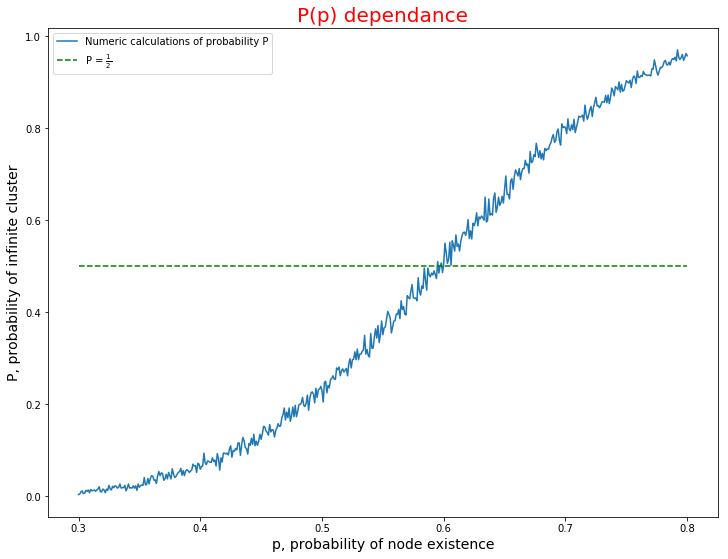

In [21]:
fig = plt.figure(figsize=(12, 9))

plt.plot(p, P, label='Numeric calculations of probability P')

plt.plot(p, np.ones(len(p)) * 1/2, color='green', linestyle='--', label = 'P = $\\frac{1}{2}$')

plt.xlabel("p, probability of node existence", fontsize=14)
plt.ylabel("P, probability of infinite cluster", fontsize=14)
plt.title("P(p) dependance", fontsize=20, color='red')

plt.legend()

plt.show()

In [22]:
np.save('lattice_prob_5', p)
np.save('inf_clust_prob_5', P)